In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
class Bandit():

    def __init__(self,win_rate,num):
        self.win_rate = win_rate
        self.num = num
        self.sample_mean = 0
        self.n_j = 0
    def pull(self):
        self.n_j +=1
        p = np.random.random()
        if p<self.win_rate:
            return 1
        return 0

In [3]:
def get_state(bandits_lineup): # hash the tuple 
    total = 0
    for i in range(len(bandits_lineup)):
        total += bandits_lineup[i].num * (10**i)
    return total

In [4]:
def epsilon_greedy(epsilon,bandits,s):
    p  = np.random.random()
    if p<epsilon:
        a = random.randint(0,len(bandits)-1)
    else:
        
        possible_actions = list(Q[s].keys())
        a_star = possible_actions[0]
        max_val = Q[s][a_star]
        for a in possible_actions:
            if Q[s][a]>max_val:
                max_val = Q[s][a]
                a_star = a
        
        return a_star
    return a

In [20]:
B1 = Bandit(0.1,num=1)
B2 = Bandit(0.2,num=2)
# B3 = Bandit(0.2,num=3)

Q = {}
bandits = [B1,B2]

alpha = random.random()
def train(steps,epsilon=0.1):
   
    N = []
    rewards = []
    total = 0
    for _ in range(steps):
        # add none stationary element by changing the winrate of B1 from 70% to 10%. and see if epsilon greedy recovers
        if _ == 150:
            print("BEFORE WINRATE FLIPPED")
            for b in bandits:
                print(b.num,b.n_j)
            print("------------")
            B1.win_rate = 0.1
        N.append(_)
        random.shuffle(bandits)
        if get_state(bandits) not in Q:
            Q[get_state(bandits)] = {0:0,1:0,2:0}
        s = get_state(bandits)
        a = epsilon_greedy(epsilon,bandits,s)
        
        bandit = bandits[a]
        reward = bandit.pull()
        total += reward
        rewards.append(total/(_+1))
        Q[s][a]= Q[s][a] + alpha*(reward -Q[s][a])
        # bandit.update(reward)
    return N,rewards
N,rewards = train(1000,0.1)

Q

BEFORE WINRATE FLIPPED
2 120
1 30
------------


{21: {0: 0.06695940558508387, 1: 0.3049224261958051, 2: 0},
 12: {0: 0.23832898179621057, 1: 0.0, 2: 0}}

FINAL NUM TIMES PULLED BANDIT X
2 585
1 415


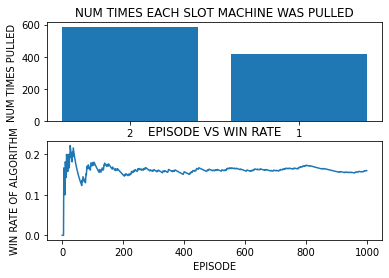

In [19]:
objects  = (bandits[0].num,bandits[1].num)
y_pos = np.arange(len(objects))
num_times_pulled = [x.n_j for x in bandits]
plt.figure(1)
plt.subplot(211)
plt.bar(y_pos, num_times_pulled)
plt.xticks(y_pos,objects)
plt.ylabel("NUM TIMES PULLED")
plt.title("NUM TIMES EACH SLOT MACHINE WAS PULLED")

print("FINAL NUM TIMES PULLED BANDIT X")
for b in bandits:
    print(b.num,b.n_j)
plt.subplot(212)
plt.title("EPISODE VS WIN RATE")
plt.xlabel("EPISODE")
plt.ylabel("WIN RATE OF ALGORITHM")
plt.plot(N,rewards)

plt.show()